<a href="https://colab.research.google.com/github/CarlosCordova2023/TransferenciaDeAprendizajes/blob/main/TransferenciaDeAprendizajes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Transferencia de aprendizaje / Transfer learning

In [ ]:
#Crear nuestro propio conjunto de datos

In [ ]:
!unzip jirafas/Jirafas.zip -d jirafas


Archive:  jirafas/Jirafas.zip
replace jirafas/_jirafa_4e035bd1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

NameError: name 'y' is not defined

In [ ]:
!unzip pokemon/Pokemon.zip -d pokemon



Archive:  pokemon/Pokemon.zip
  inflating: pokemon/_132740938_indeximage.jpg  
  inflating: pokemon/133.png         
  inflating: pokemon/150_Pokemon_from_Pokemon_Stadium.png  
  inflating: pokemon/151.png         
  inflating: pokemon/196.png         
  inflating: pokemon/250px-Ash_28Viajes_PokC3A9mon29_2.png  
  inflating: pokemon/25-epic-pokemon-facts_suey.jpg  
  inflating: pokemon/450_1000.jpeg   
  inflating: pokemon/47PSV2UMNBCN5LAYELRK4M2IVM.jpg  
  inflating: pokemon/500_333.jpeg    
  inflating: pokemon/500_3332.jpeg   
  inflating: pokemon/500_3333.jpeg   
  inflating: pokemon/53a13154-5976-4e93-90ba-011d139b3081_1.62c435484d4015af1c325e9cdeeb3662.jpeg  
  inflating: pokemon/633b25c66ef32968b9363e2b-pokemon-battle-figure-multi-pack.jpg  
  inflating: pokemon/640px-International_PokC3A9mon_logo.svg.png  
  inflating: pokemon/65ca3ad3b2ff376e6666058b-pokemon-cards-50-card-assorted-bulk-lot.jpg  
  inflating: pokemon/700.png         
  inflating: pokemon/71nPNbm2e9L._AC_UF10001

In [ ]:
!rm -rf pokemon/Pokemon.zip
!rm -rf jirafas/Jirafas.zip

In [ ]:
# crear un set de datos

!mkdir dataset
!cp -r pokemon dataset/pokemon
!cp -r jirafas dataset/jirafas

In [ ]:
#Aumento de datos

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generator

datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=5,
    zoom_range=[0.7,1.3],
    validation_split=0.2
)

data_gen_entrenamiento=datagen.flow_from_directory(
    "/content/dataset",
    target_size=(224,224),
    batch_size=32, shuffle=True,
    subset="training"
)

data_gen_pruebas=datagen.flow_from_directory(
    "/content/dataset",
    target_size=(224,224),
    batch_size=32, shuffle=True,
    subset="validation"
)

Found 40 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


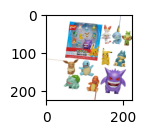

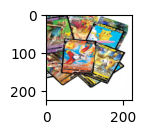

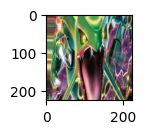

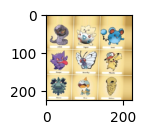

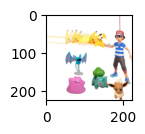

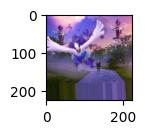

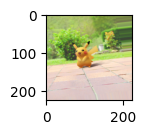

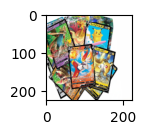

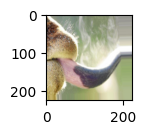

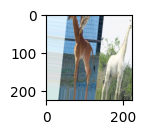

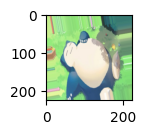

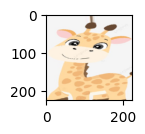

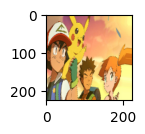

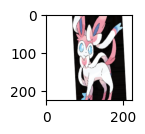

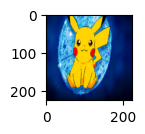

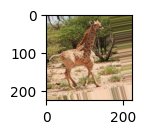

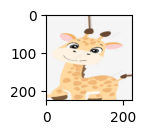

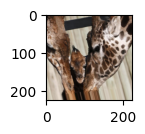

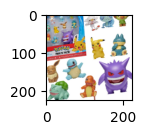

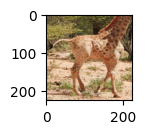

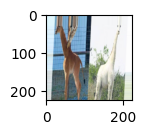

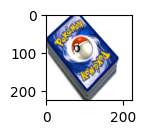

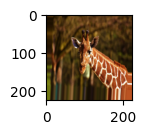

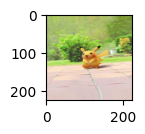

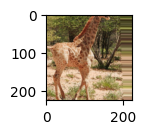

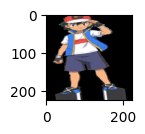

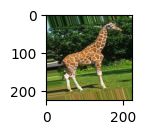

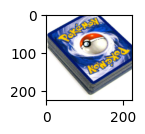

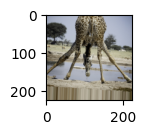

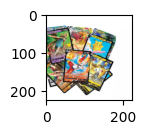

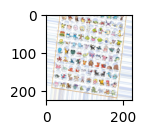

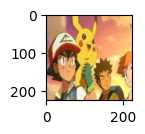

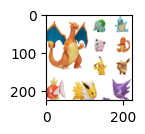

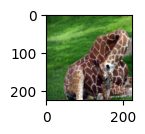

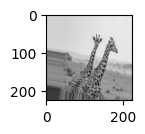

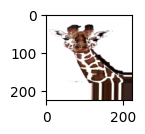

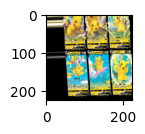

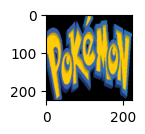

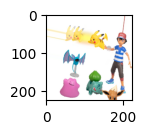

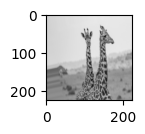

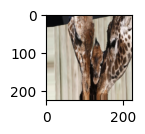

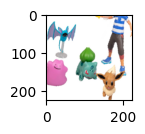

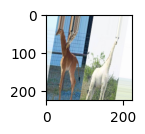

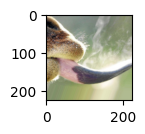

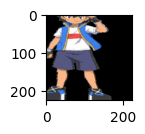

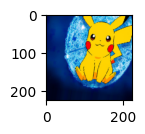

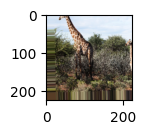

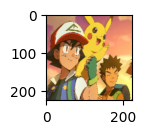

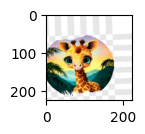

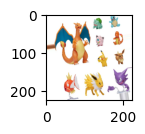

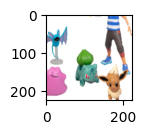

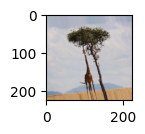

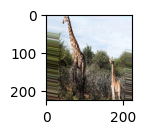

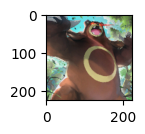

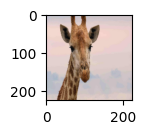

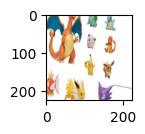

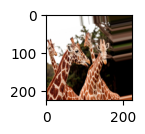

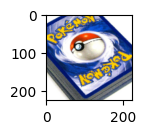

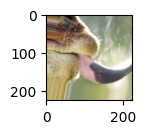

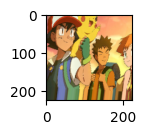

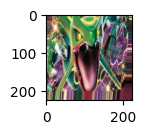

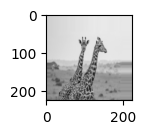

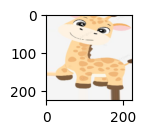

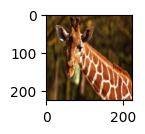

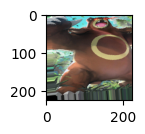

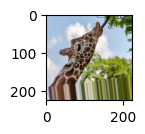

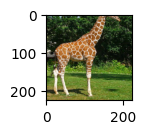

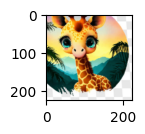

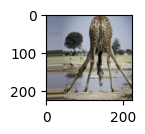

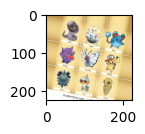

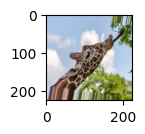

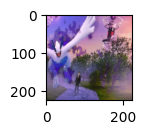

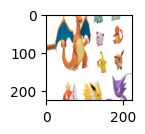

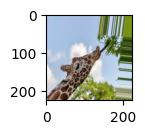

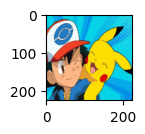

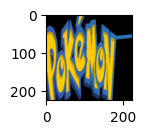

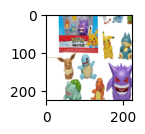

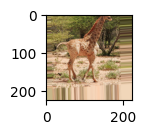

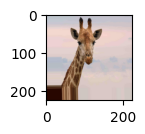

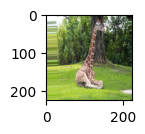

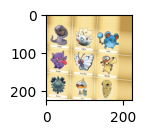

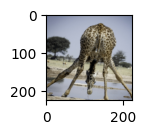

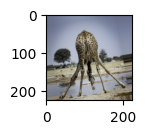

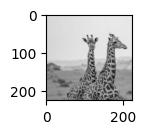

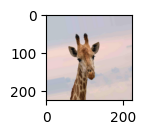

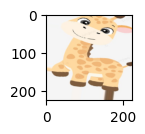

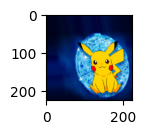

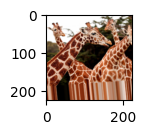

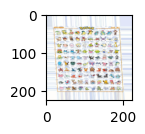

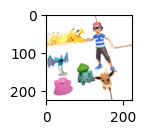

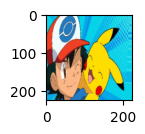

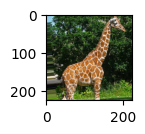

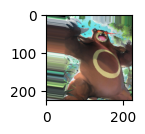

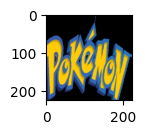

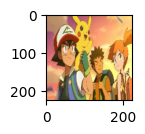

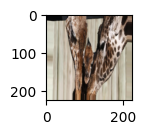

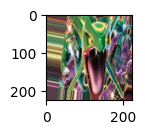

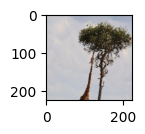

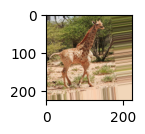

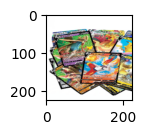

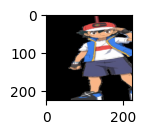

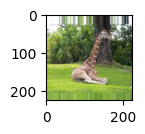

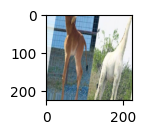

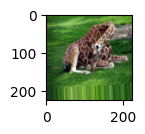

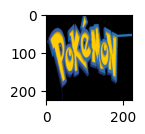

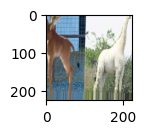

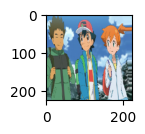

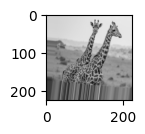

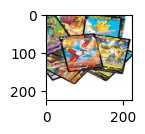

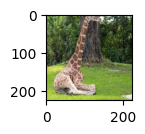

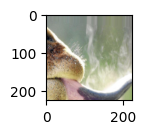

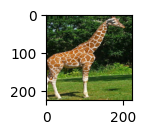

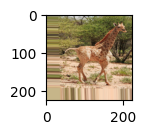

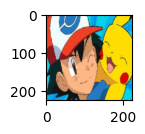

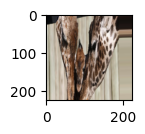

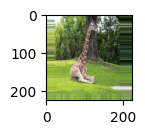

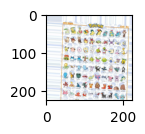

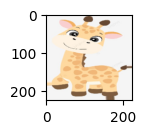

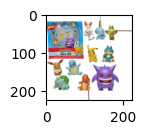

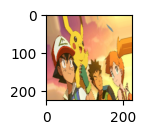

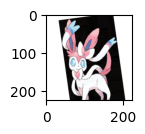

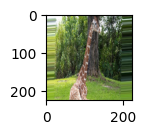

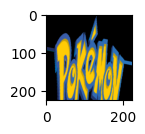

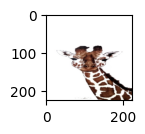

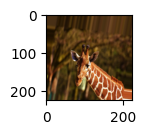

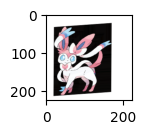

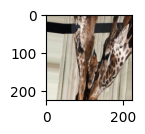

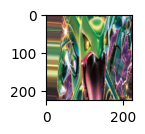

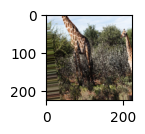

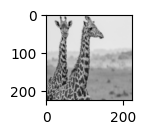

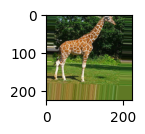

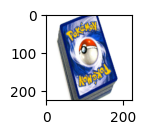

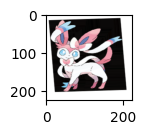

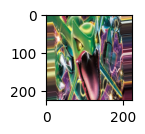

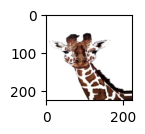

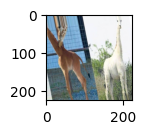

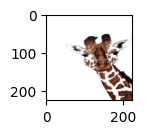

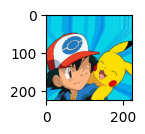

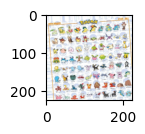

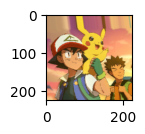

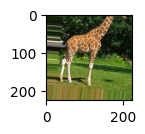

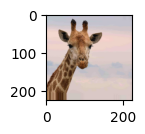

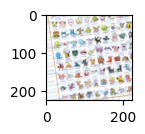

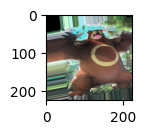

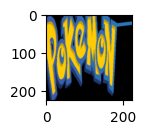

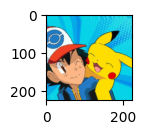

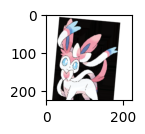

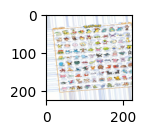

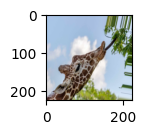

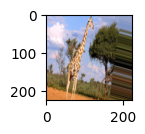

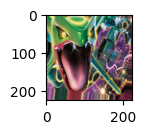

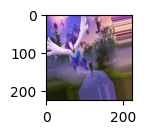

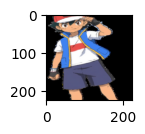

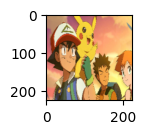

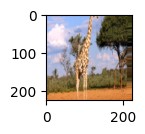

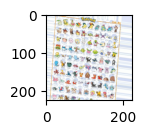

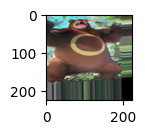

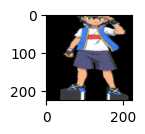

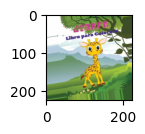

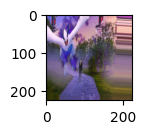

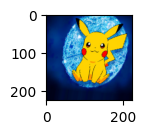

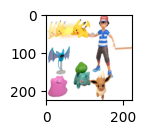

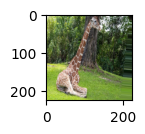

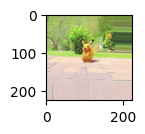

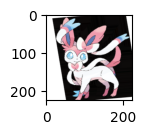

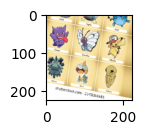

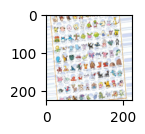

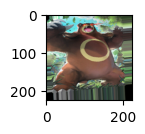

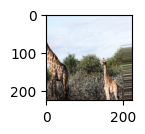

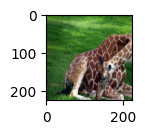

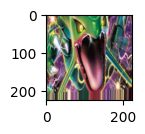

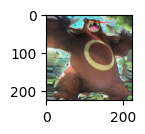

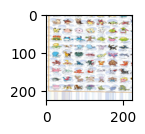

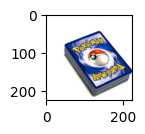

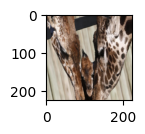

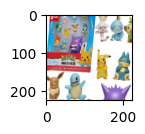

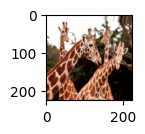

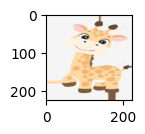

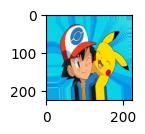

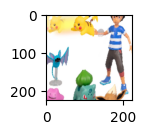

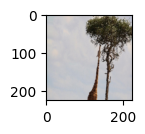

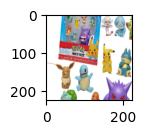

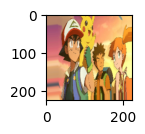

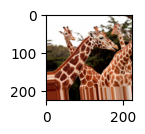

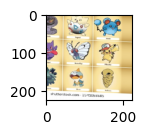

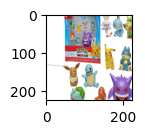

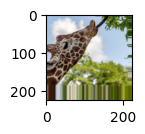

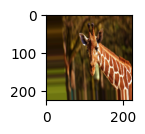

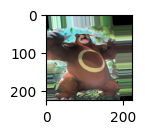

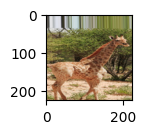

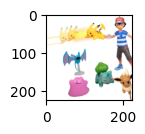

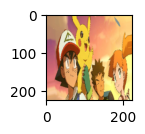

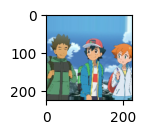

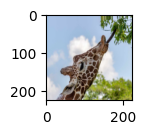

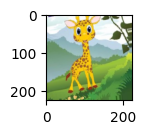

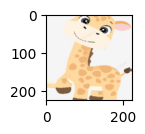

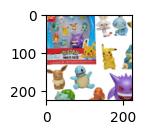

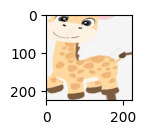

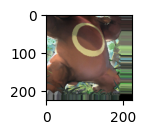

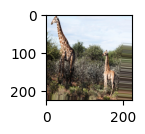

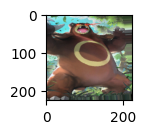

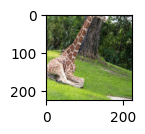

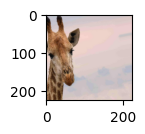

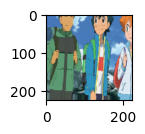

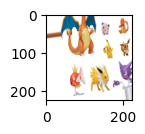

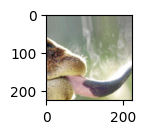

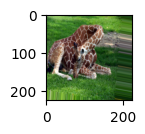

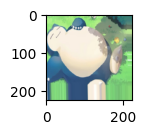

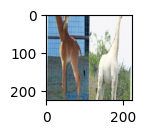

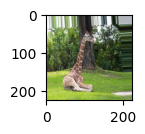

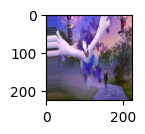

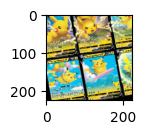

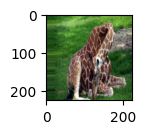

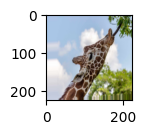

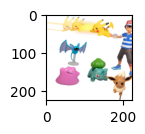

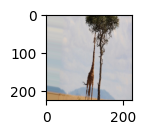

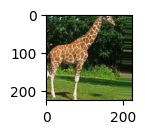

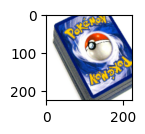

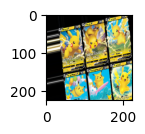

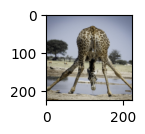

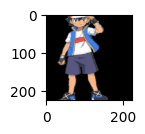

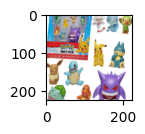

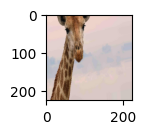

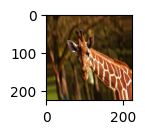

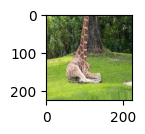

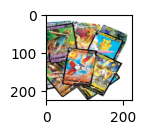

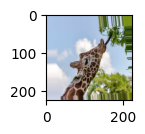

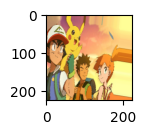

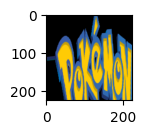

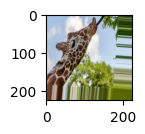

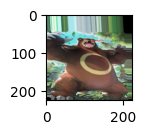

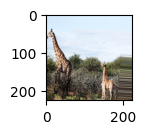

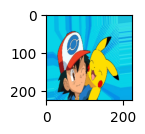

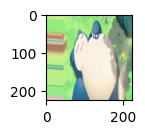

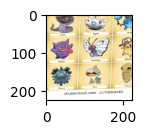

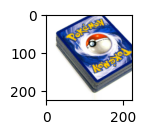

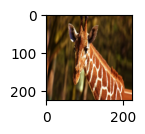

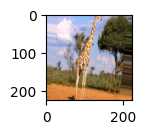

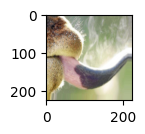

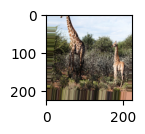

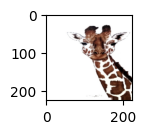

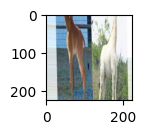

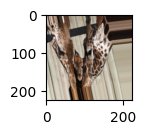

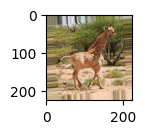

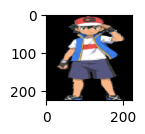

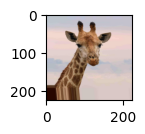

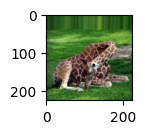

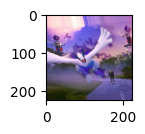

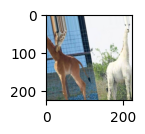

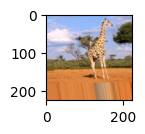

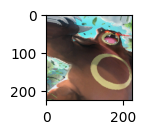

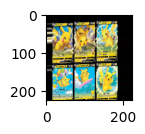

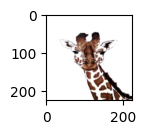

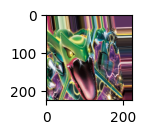

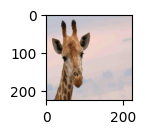

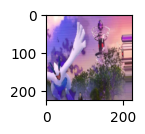

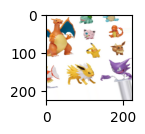

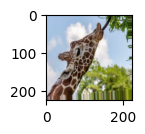

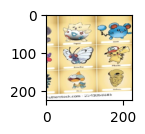

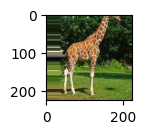

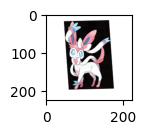

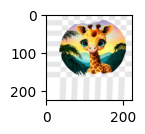

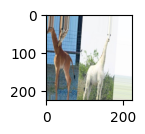

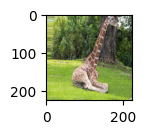

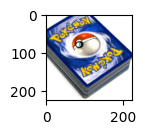

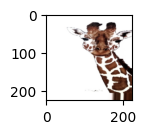

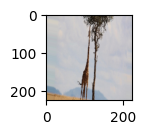

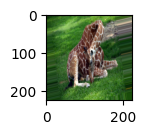

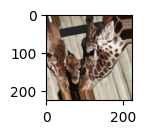

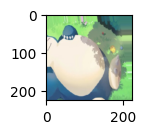

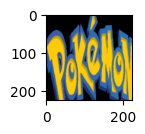

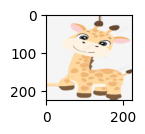

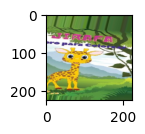

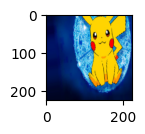

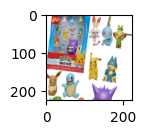

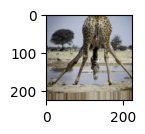

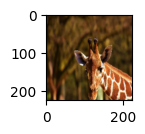

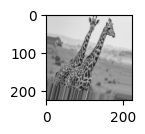

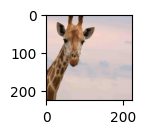

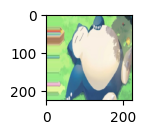

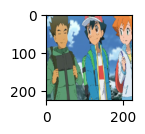

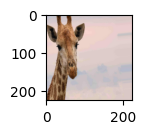

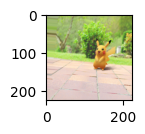

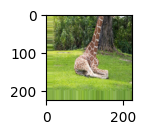

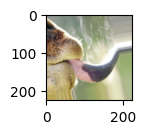

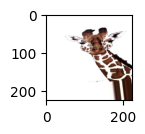

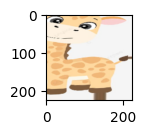

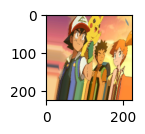

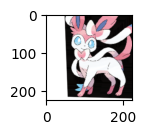

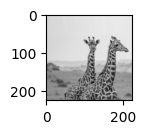

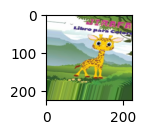

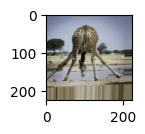

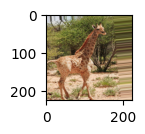

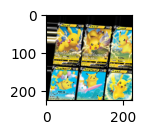

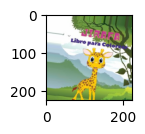

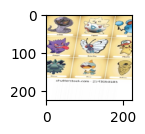

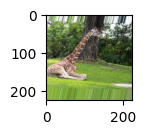

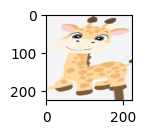

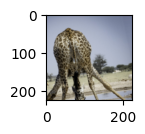

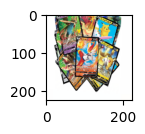

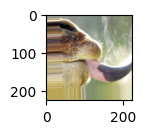

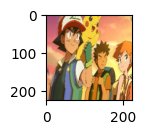

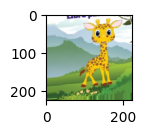

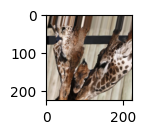

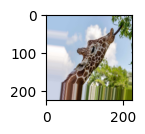

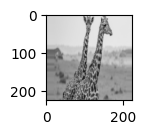

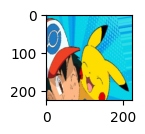

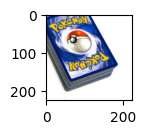

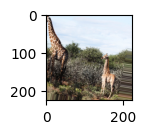

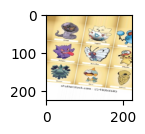

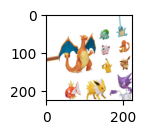

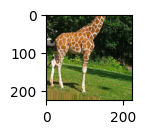

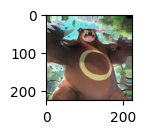

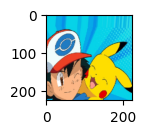

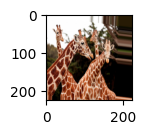

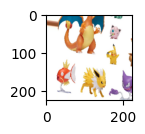

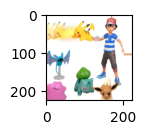

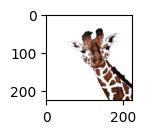

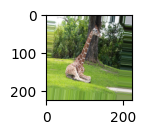

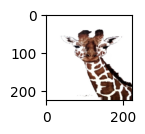

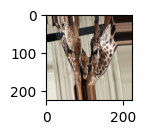

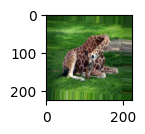

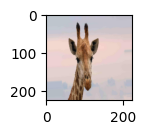

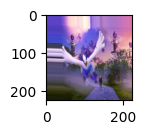

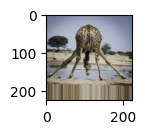

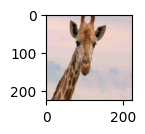

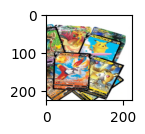

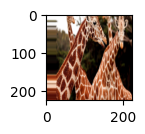

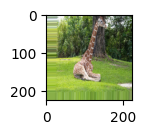

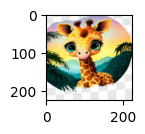

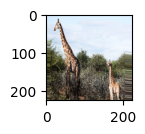

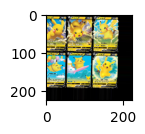

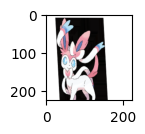

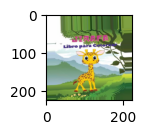

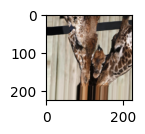

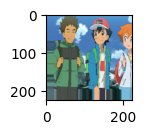

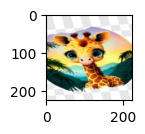

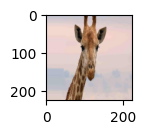

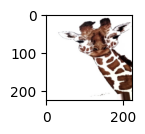

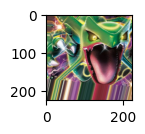

In [ ]:
import matplotlib.pyplot as plt

for imagenes, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(imagenes[i]),

    break
  plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2=hub.kerasLayer(url,inout_shape=(224,224,3))

In [ ]:
mobilenetv2.trainable=False

In [ ]:
modelo=tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.dense(2,activation="softmax")
])

In [ ]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
EPOCAS=50
entrenamiento=modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

In [ ]:
from PIL import Image
impor cv2

def categorizar(ruta):
  img=Image.open(ruta)
  img=img.convert("RGB")
  img=np.array(img).astype(float)/255

  img=cv2.resize(img,(224,224))
  prediccion=modelo.predict(img.reshape(-1,224,224,3))
  return np.argmax(prediccion[0],axis=-1)


In [ ]:
ruta="jirafa.jpg"
prediccion=categorizar(ruta)
print(prediccion)



In [ ]:
ruta="pokemon.jpg"
prediccion=categorizar(ruta)
print(prediccion)
